# Probability Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

In [2]:
cars_dist = stats.poisson(2)
cars_dist.pmf(0)

0.1353352832366127

In [3]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [4]:
cars_dist = stats.poisson(2)
cars_dist.sf(2)

0.32332358381693654

In [5]:
cars_dist.sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

What GPA constitutes the bottom 15% of the class?

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.

Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

If I have a GPA of 3.5, what percentile am I in?

In [6]:
mean = 3
stdev = .3 

grades_dist = stats.norm(mean, stdev)
grades_dist.isf(.05)

3.4934560880854417

In [7]:
lower_bound = grades_dist.ppf(.2)

lower_bound

2.7475136299281258

In [8]:
upper_bound = grades_dist.ppf(.3)

upper_bound

2.842679846187588

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [9]:
(np.random.binomial(4326, .02, 100_000)>=97).mean()

0.14086

In [10]:
n_trials = 60
p = 1/100

corr_answers = stats.binom(60, 1/101)
corr_answers.sf(0)

0.44955038406224

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

What is the probability that at least one of your first 60 answers is correct?

In [11]:
at_least_one_right = (np.random.binomial(n_trials, p, 100000) > 0).mean()
at_least_one_right

0.45131

In [12]:
time = 1         # one day
p_success = .03  # a success is a clean
n_trials = 59    # number of visits to kitchen

clean_dist = stats.binom(59, .03)
success = clean_dist.sf(0)
success

0.8342199288437355

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [13]:
cleaned_up = (np.random.binomial(n_trials, p_success, 100_000) > 0).mean()
cleaned_up

0.83446

In [14]:
failure = 1 - success
failure * failure

0.027483031992576113

In [15]:
n = round(0.09 * 3 * 22)
p = 0.03

stats.binom(n, p)

Text(0.5, 0, 'Number of time area is cleaned per day')

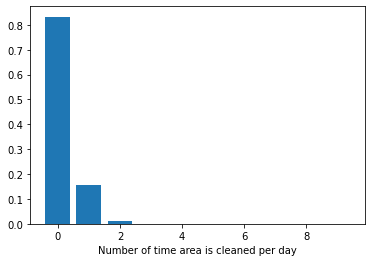

In [16]:
x = np.arange(0, 10)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y)
plt.xlabel('Number of time area is cleaned per day')

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [17]:
mean = 30
stdev = 6
#60 mins -27

wait_dist = stats.norm(30, 6)
wait_dist.cdf(33)

0.6914624612740131

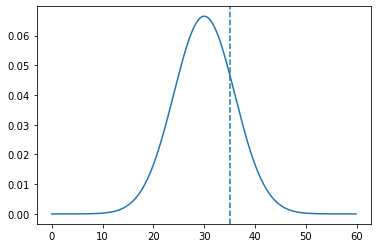

In [18]:
x = np.arange(0, 60, 0.1)
y = stats.norm(mean, stdev).pdf(x)

plt.plot(x,y)
plt.axvline(35, ls = '--')


### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.



What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [19]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [24]:
url = get_db_url("employees")
sql = "select * from salaries where to_date > now()"
emp_salaries = pd.read_sql(sql, url)

In [25]:
emp_salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [27]:
emp_salaries.salary.mean(), emp_salaries.salary.std()

mean = emp_salaries.salary.mean()
std = emp_salaries.salary.std()

In [29]:
salaries_now = stats.norm(mean, std)

''

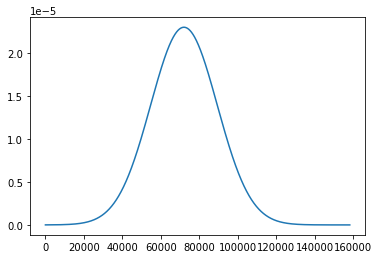

In [30]:
x = np.arange (0, round(emp_salaries.salary.max()))
y = salaries_now.pdf(x)

plt.plot(x,y)
;

In [31]:
salaries_now.cdf(60000)

0.24385742480214423

In [33]:
salaries_now.sf(95000)

0.09208819199804053

In [35]:
np.diff(salaries_now.cdf([65_000, 80_000]))

array([0.33506057])

In [38]:
salaries_now.isf(.05)

100484.64454102777